In [ ]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import CountVectorizer

# df = pd.read_csv('clean_Tweets.csv')
df = pd.read_csv("../../../data/clean_Tweets.csv")

df['text'] = df['text'].apply(lambda x: ' '.join(ast.literal_eval(x)))

vectorizer = CountVectorizer(max_features=5000, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df['text'])

print("Shape of feature matrix:", X.shape)
print("First 20 feature names:", vectorizer.get_feature_names_out()[:20])


Shape of feature matrix: (14427, 2571)
First 20 feature names: ['0am' '0pm' '10' '100' '1000' '1024' '10pm' '11' '12' '1200' '1230' '13'
 '130' '136' '13th' '14' '140' '15' '150' '15th']


Training Accuracy: 0.8626635473529157
Testing Accuracy: 0.7813582813582813
Precision: 0.7755556728472802
Recall: 0.7813582813582813
F1 Score: 0.7773793992928365


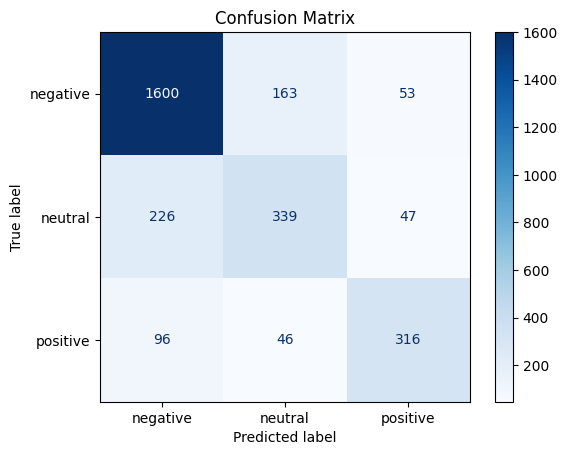

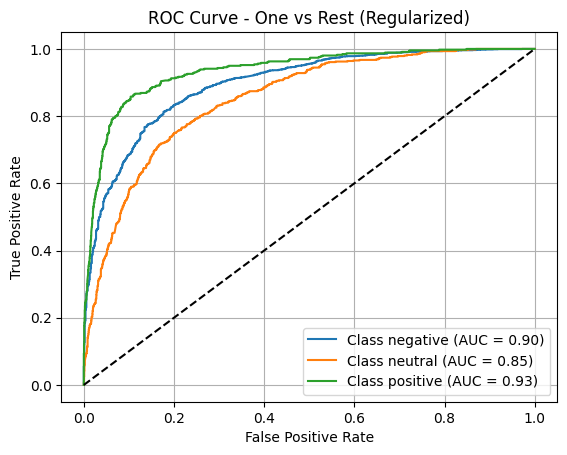

In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
y = df['airline_sentiment']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C=0.5, max_iter=1000)  # smaller C = stronger regularization
log_model.fit(X_train, y_train)

train_preds = log_model.predict(X_train)
test_preds = log_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
print("Training Accuracy:", accuracy_score(y_train, train_preds))
print("Testing Accuracy:", accuracy_score(y_test, test_preds))
print("Precision:", precision_score(y_test, test_preds, average='weighted'))
print("Recall:", recall_score(y_test, test_preds, average='weighted'))
print("F1 Score:", f1_score(y_test, test_preds, average='weighted'))

cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000, C=0.5))
classifier.fit(X_train, label_binarize(y_train, classes=[0, 1, 2]))
y_score = classifier.decision_function(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - One vs Rest (Regularized)")
plt.legend()
plt.grid()
plt.show()


Training Accuracy: 0.810761632440863
Testing Accuracy: 0.7564102564102564
Precision: 0.7462151400813525
Recall: 0.7564102564102564
F1 Score: 0.7493260300997244


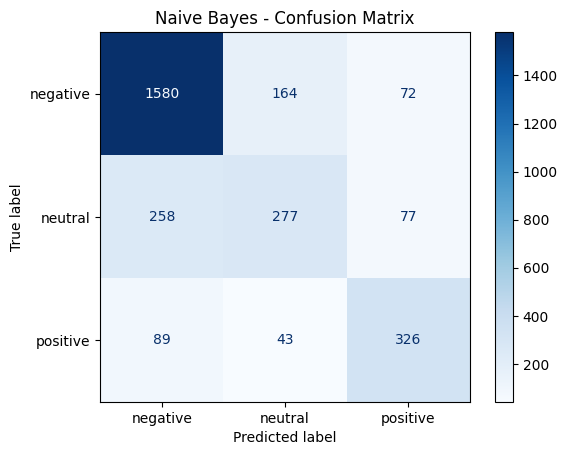

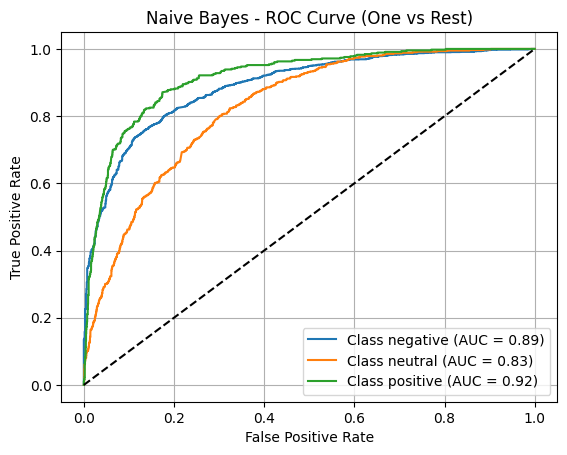

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

train_preds = nb_model.predict(X_train)
test_preds = nb_model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, train_preds))
print("Testing Accuracy:", accuracy_score(y_test, test_preds))
print("Precision:", precision_score(y_test, test_preds, average='weighted'))
print("Recall:", recall_score(y_test, test_preds, average='weighted'))
print("F1 Score:", f1_score(y_test, test_preds, average='weighted'))

cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

nb_ovr = OneVsRestClassifier(MultinomialNB())
nb_ovr.fit(X_train, label_binarize(y_train, classes=[0, 1, 2]))
y_score = nb_ovr.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes - ROC Curve (One vs Rest)")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:11:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.8027034052508448
Testing Accuracy: 0.7529452529452529
Precision: 0.7427900344692148
Recall: 0.7529452529452529
F1 Score: 0.7239446429467944


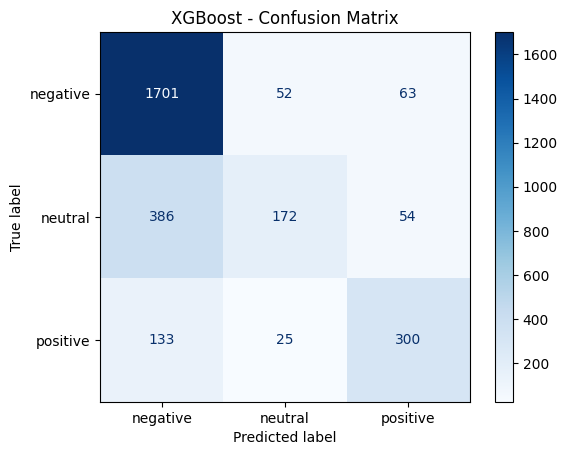

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:11:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:11:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:11:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


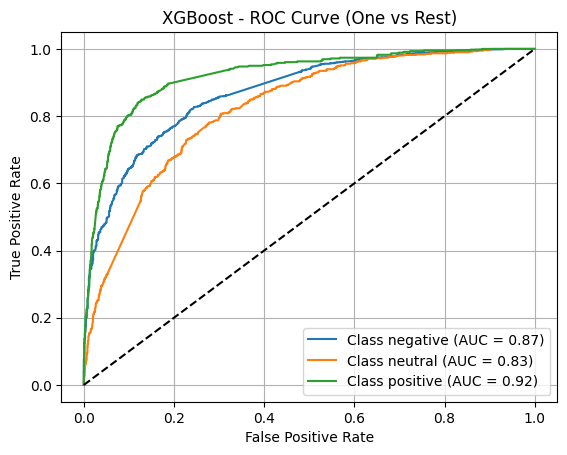

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

train_preds = xgb_model.predict(X_train)
test_preds = xgb_model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, train_preds))
print("Testing Accuracy:", accuracy_score(y_test, test_preds))
print("Precision:", precision_score(y_test, test_preds, average='weighted'))
print("Recall:", recall_score(y_test, test_preds, average='weighted'))
print("F1 Score:", f1_score(y_test, test_preds, average='weighted'))

cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.show()

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

xgb_ovr = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
xgb_ovr.fit(X_train, label_binarize(y_train, classes=[0, 1, 2]))
y_score = xgb_ovr.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost - ROC Curve (One vs Rest)")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.6363 - loss: 0.8885 - val_accuracy: 0.7414 - val_loss: 0.6198
Epoch 2/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.7791 - loss: 0.5617 - val_accuracy: 0.7644 - val_loss: 0.5682
Epoch 3/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8394 - loss: 0.4380 - val_accuracy: 0.7744 - val_loss: 0.5786
Epoch 4/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8667 - loss: 0.3793 - val_accuracy: 0.7692 - val_loss: 0.6103
Epoch 5/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.8854 - loss: 0.3161 - val_accuracy: 0.7648 - val_loss: 0.7137
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8542 - loss: 0.4258
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7830 - loss: 0.5640
Training Accuracy: 0.8379690051078796
Testing Accuracy: 0.787595272064209
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
              precision    recall  f1-score   support

    negative       0.85      0.

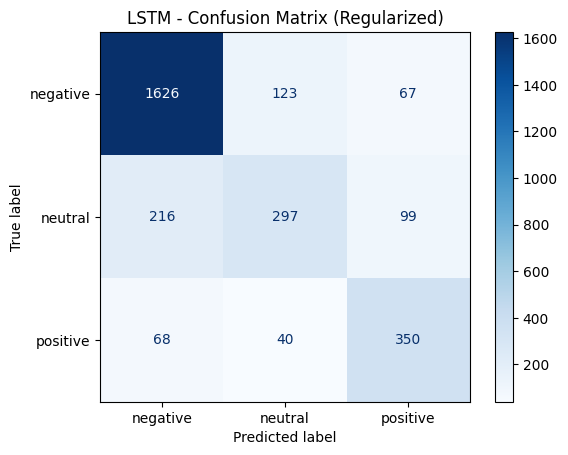

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


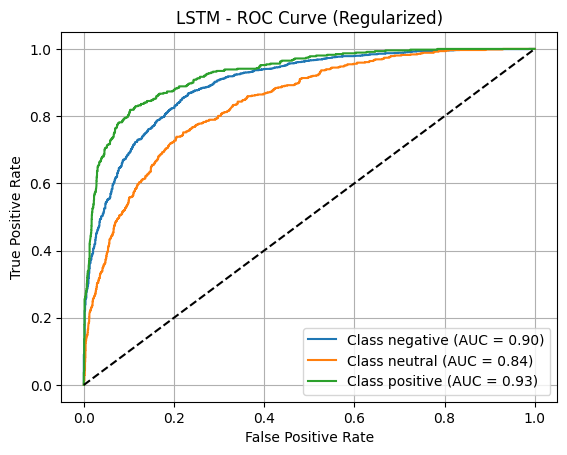

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

max_words = 3000      # Reduced vocabulary
max_len = 80          # Shorter sequence

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences, maxlen=max_len)

le = LabelEncoder()
y_encoded = le.fit_transform(df['airline_sentiment'])
y_bin = label_binarize(y_encoded, classes=[0, 1, 2])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    LSTM(32),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop]
)

train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("LSTM - Confusion Matrix (Regularized)")
plt.show()

y_score = model.predict(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LSTM - ROC Curve (Regularized)")
plt.legend()
plt.grid()
plt.show()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


289/289 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.6343 - loss: 0.8753 - val_accuracy: 0.7311 - val_loss: 0.6360
Epoch 2/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.7621 - loss: 0.5730 - val_accuracy: 0.7601 - val_loss: 0.5823
Epoch 3/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.8341 - loss: 0.4509 - val_accuracy: 0.7705 - val_loss: 0.6189
Epoch 4/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - accuracy: 0.8723 - loss: 0.3605 - val_accuracy: 0.7687 - val_loss: 0.6044
Epoch 5/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 26s 90ms/step - accuracy: 0.8943 - loss: 0.3103 - val_accuracy: 0.7661 - val_loss: 0.6407
361/361 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8383 - loss: 0.4322
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7648 - loss: 0.5752
Training Accuracy: 0.8245385885238647
Testing Accuracy: 0.7723492980003357
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
              precision    recall  f1-score   support

    negative       0.87      0.86      0.

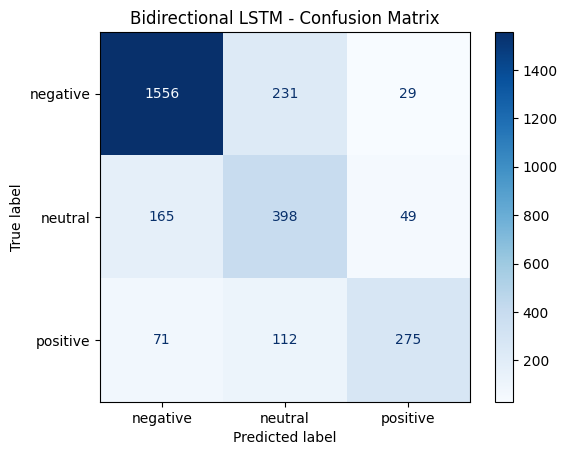

91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


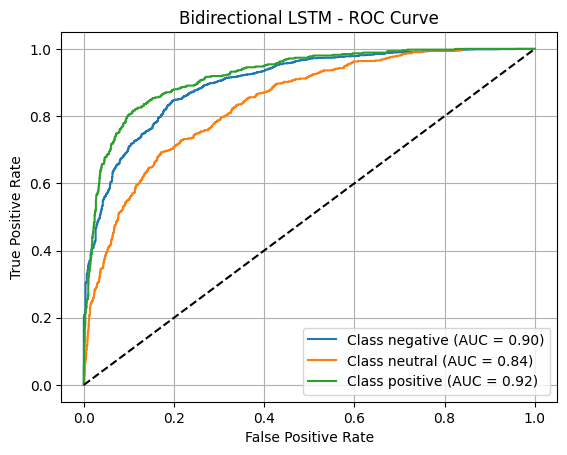

In [ ]:
from tensorflow.keras.layers import Bidirectional

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop]
)

train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Bidirectional LSTM - Confusion Matrix")
plt.show()

from sklearn.metrics import roc_curve, auc

y_score = model.predict(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Bidirectional LSTM - ROC Curve")
plt.legend()
plt.grid()
plt.show()
